In [36]:
%matplotlib inline

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.transforms as mtransforms
import matplotlib.gridspec as gridspec

import scipy
import scipy.constants
import scipy.stats as st
from scipy.stats import norm
from scipy.stats import shapiro

import random

import data_util as util


S_PARAM = 9
ROOT = "../sims_out/s/s%d/" % S_PARAM


In [37]:
'''Pull in data for 1st shell analysis'''


# Pull in coords.dmp
dmp = ROOT + "coords.dmp"
coords_dat = "out/s%d/coords.dat" % S_PARAM
tot_lns = 10011
lns_per_time = 10
bad_lns = 9
tsteps_on = True
first_tstep = 10000
last_tstep = 5010000
tstep_size = 5000
cols = {
    0: "c_coords"
}
coords_data = util.dmp_to_dat(dmp, coords_dat, tot_lns, lns_per_time, bad_lns, cols, tsteps_on=tsteps_on, first_tstep=
                         first_tstep, last_tstep=last_tstep, tstep_size=tstep_size)
# Pull in log.lammps
thermo = ROOT + "log.lammps"
thermo_dat = "out/s%d/thermo.dat" % S_PARAM
header_len = 238
last_ln = 1239
tot_len = 1271
first_tstep = 10000
last_tstep = 5010000
tstep_size = 5000
cols = {  
    1: "Temp",  
    2: "E_pair",  
    3: "E_mol",  
    4: "TotEng",  
    5: "Press"
}
thermo_data = util.thermo_to_dat(thermo, thermo_dat, header_len, last_ln, tot_len, cols, first_tstep, last_tstep, 
                                 tstep_size)
#Hacky -- lazy, so just converting these to dictionaries since everything was written for this
# Convert to dictionary of numpy arrays:
thermo_data = thermo_data.to_dict("series")
for key in thermo_data:
    thermo_data[key] = np.array(thermo_data[key].values)
coords_data = coords_data.to_dict("series")
for key in coords_data:
    coords_data[key] = np.array(coords_data[key].values)
    

In [3]:
'''Pull in data for 2nd shell analysis'''


# Pull in coords2.dmp
dmp = ROOT + "coords2.dmp"
coords_dat = "out/s%d/coords2.dat" % S_PARAM
tot_lns = 10011
lns_per_time = 10
bad_lns = 9
tsteps_on = True
first_tstep = 10000
last_tstep = 5010000
tstep_size = 5000
cols = {
    0: "c_coords2"
}
coords2_data = util.dmp_to_dat(dmp, coords_dat, tot_lns, lns_per_time, bad_lns, cols, tsteps_on=tsteps_on, first_tstep=
                         first_tstep, last_tstep=last_tstep, tstep_size=tstep_size)

# Pull in log.lammps
thermo = ROOT + "log.lammps"
thermo_dat = "out/s%d/thermo.dat" % S_PARAM
header_len = 238
last_ln = 1239
tot_len = 1271
first_tstep = 10000
last_tstep = 5010000
tstep_size = 5000
cols = {  
    1: "Temp",  
    2: "E_pair",  
    3: "E_mol",  
    4: "TotEng",  
    5: "Press"
}
thermo_data = util.thermo_to_dat(thermo, thermo_dat, header_len, last_ln, tot_len, cols, first_tstep, last_tstep, 
                                 tstep_size)

# Convert to dictionary of numpy arrays:
thermo_data = thermo_data.to_dict("series")
for key in thermo_data:
    thermo_data[key] = np.array(thermo_data[key].values)
coords2_data = coords2_data.to_dict("series")
for key in coords2_data:
    coords2_data[key] = np.array(coords2_data[key].values)
    
# Find 2nd shell numbers
coords2_data["c_coords2"] -= coords_data["c_coords"]
coords_data["c_coords"] = coords2_data["c_coords2"]
    

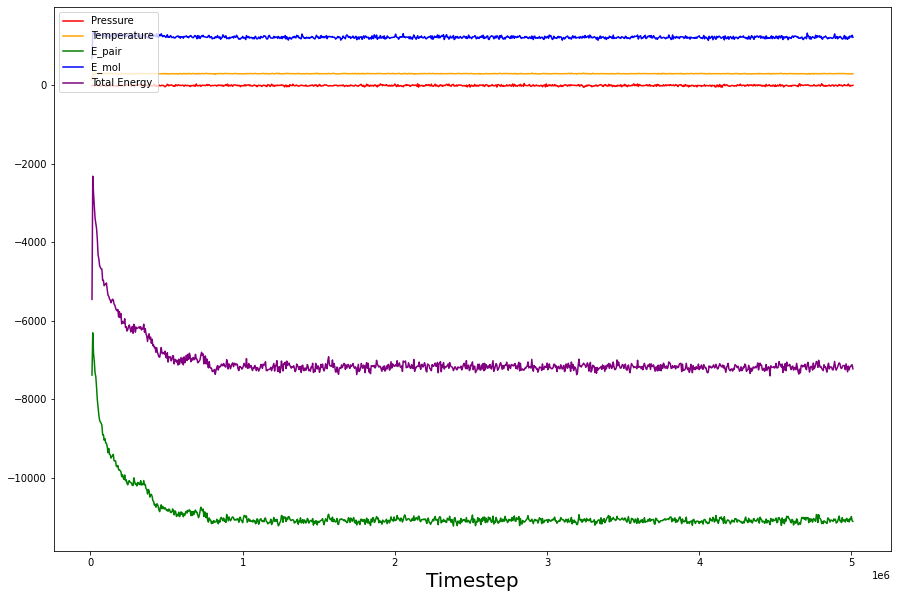

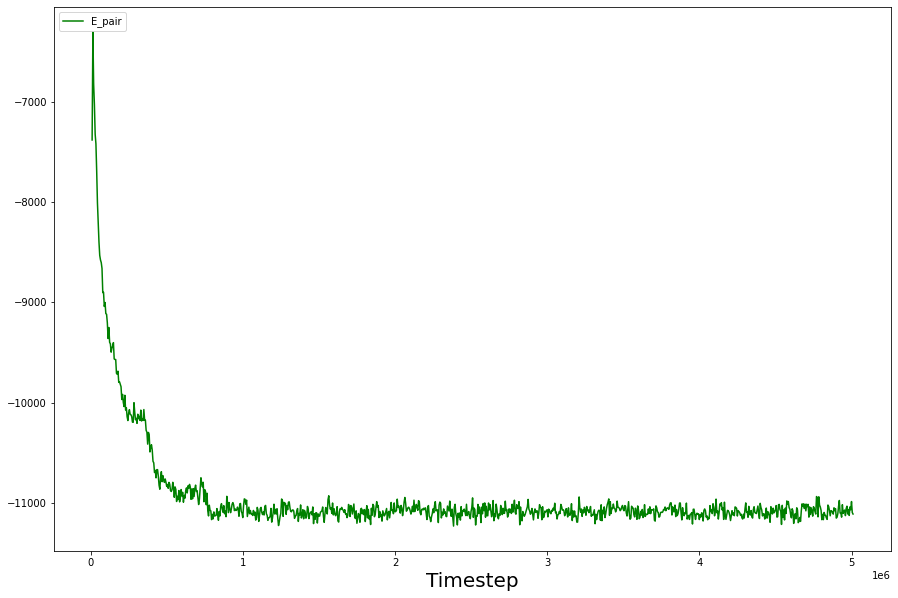

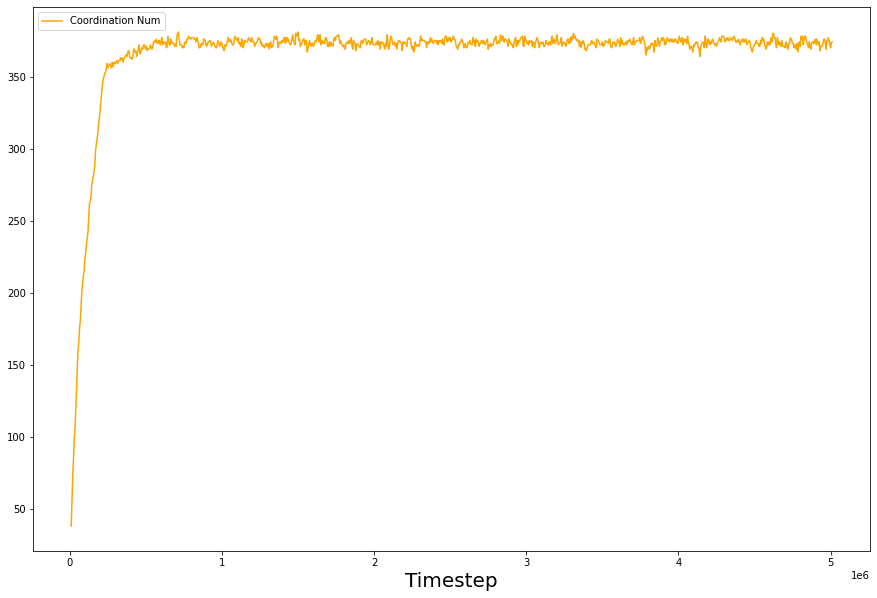

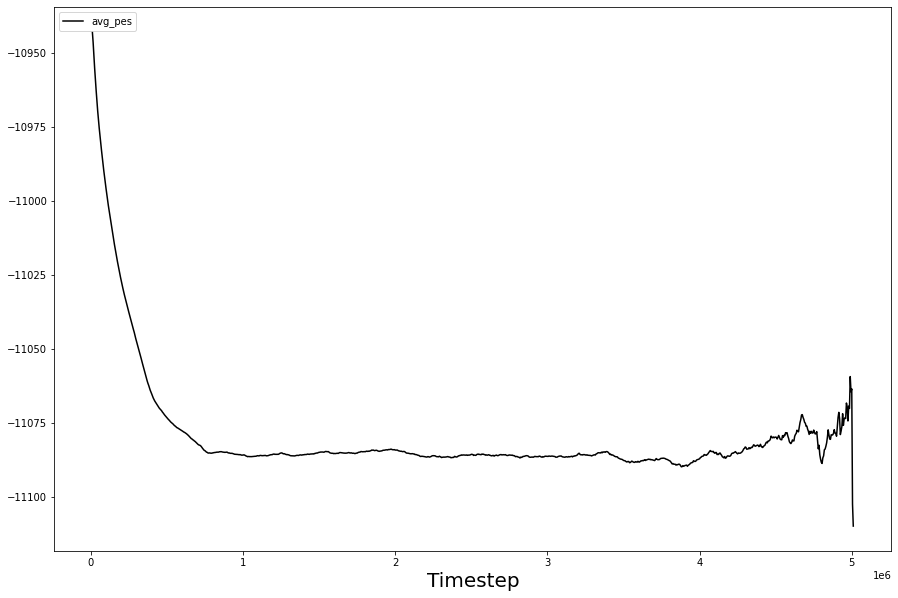

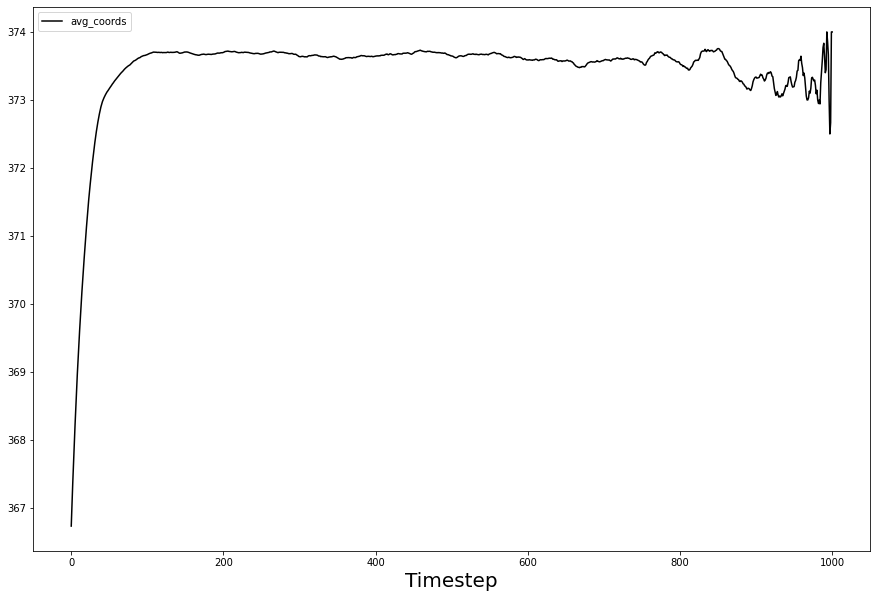

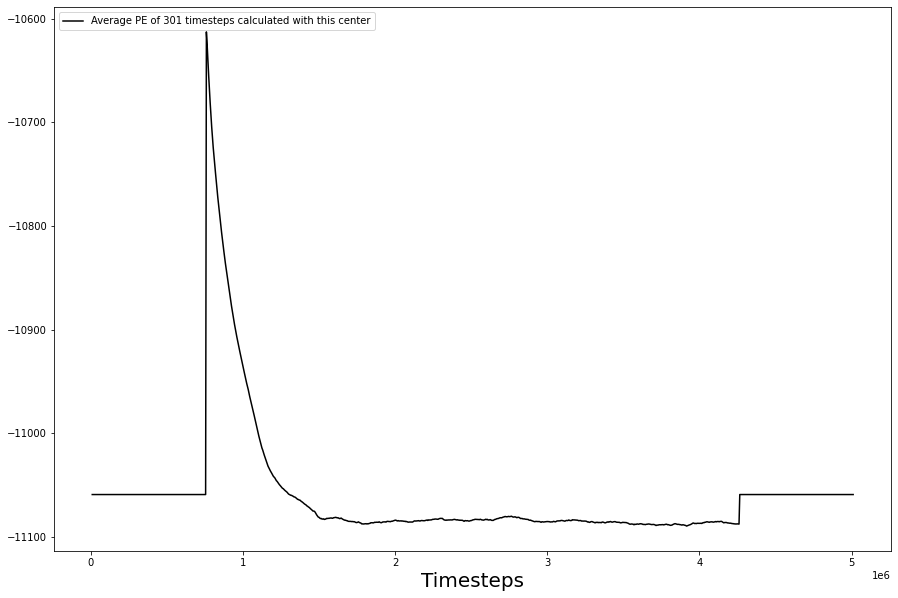

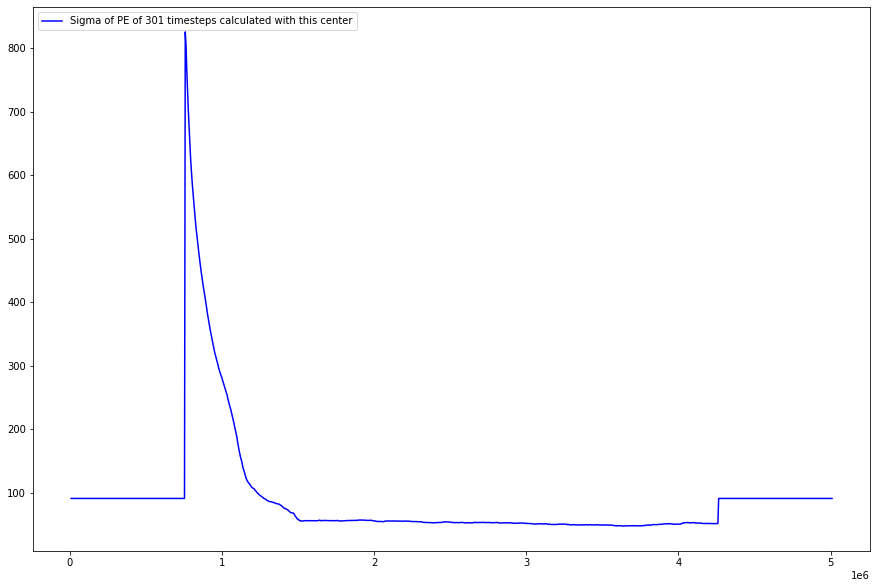

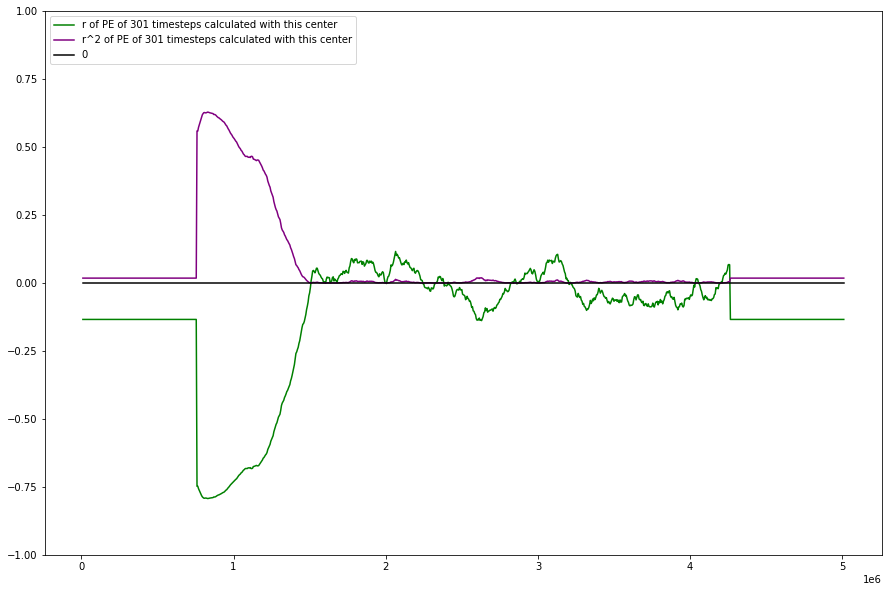

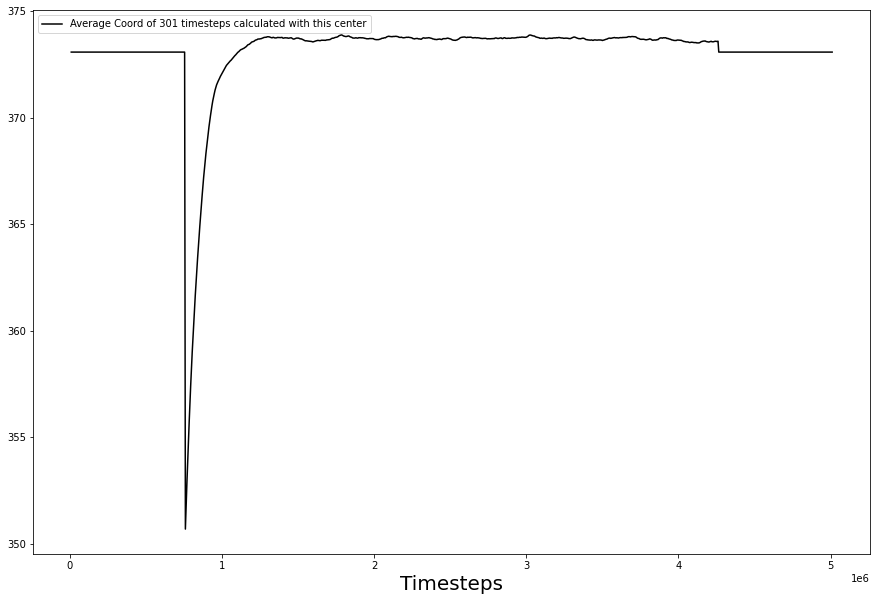

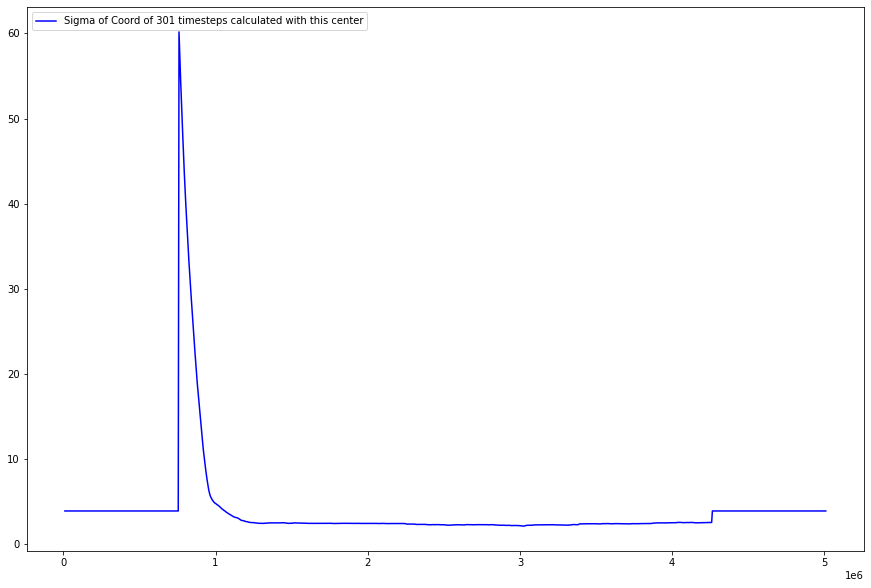

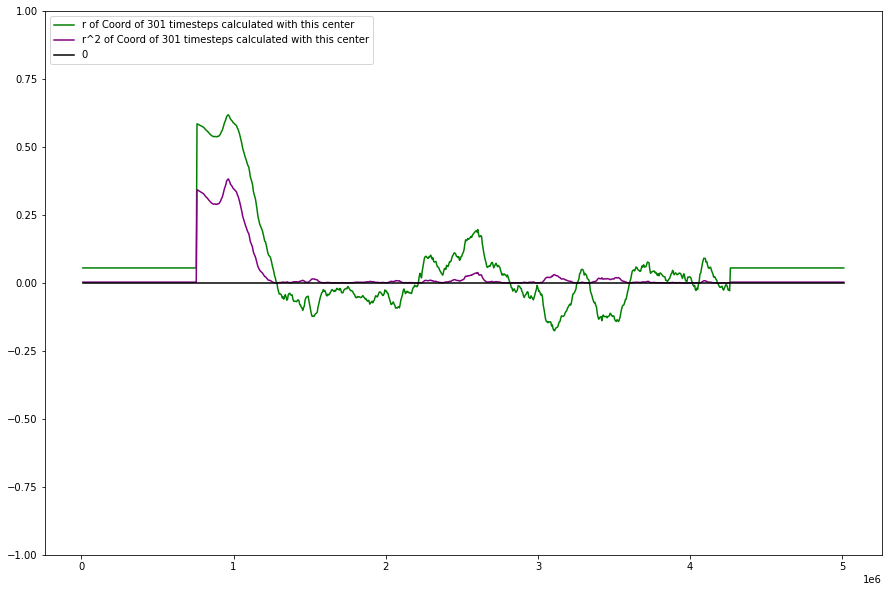

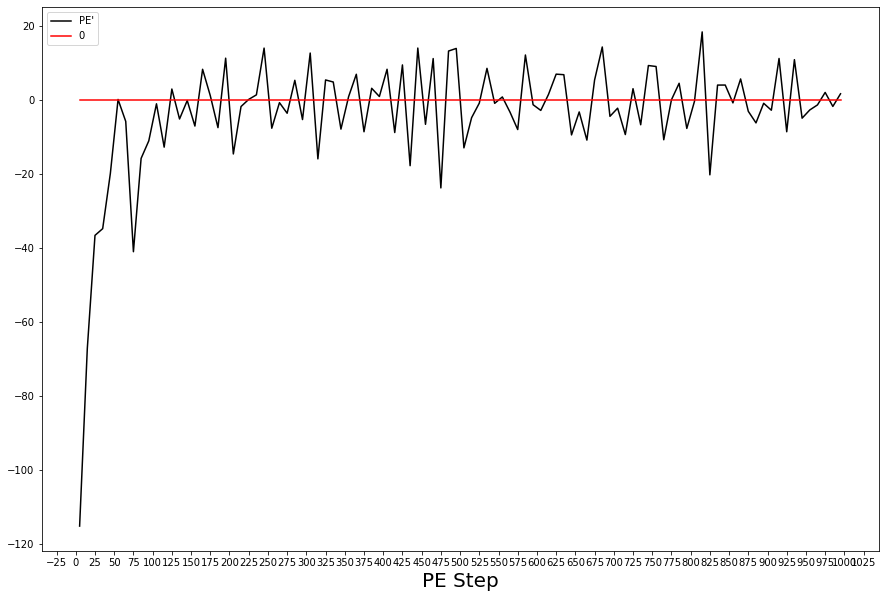

[[ 54.96357925]
 [ 55.12259993]
 [123.16023266]
 [128.56889235]
 [159.63926613]
 [176.26905024]
 [189.01996777]
 [199.33679037]
 [224.54918459]
 [251.44182109]
 [279.10471605]
 [289.94605793]
 [297.98349037]
 [309.40993028]
 [322.49472963]
 [338.75900752]
 [354.03132898]
 [369.42779142]
 [382.37146414]
 [409.81439174]
 [419.85299519]
 [428.45340518]
 [440.6077926 ]
 [451.77404463]
 [458.74160204]
 [468.18148738]
 [481.44312982]
 [500.15786648]
 [525.98439913]
 [543.96367352]
 [550.66631932]
 [556.81933069]
 [579.00113338]
 [593.99501345]
 [611.71567829]
 [639.15577141]
 [671.7218637 ]
 [692.60536276]
 [722.59481707]
 [728.05800912]
 [739.22892109]
 [759.5354702 ]
 [775.05246166]
 [788.6414221 ]
 [805.22064247]
 [819.7444222 ]
 [833.36890678]
 [853.2249787 ]
 [856.322712  ]
 [871.41830529]
 [907.03164149]
 [920.62848272]
 [929.44341649]
 [941.84764915]
 [969.16006645]
 [980.20820106]
 [990.30550674]]


In [38]:
block_width = 301
fatness = 10


'''FIND 2ND EQUILIBRIUM POINT'''


# Make plots
# Basic plots
# Plot thermo data
timesteps = thermo_data["timestep"]
fig, ax = plt.subplots(figsize=[15, 10])
ax.plot(timesteps, thermo_data["Press"], label="Pressure", color="red", linestyle="solid")
ax.plot(timesteps, thermo_data["Temp"], label="Temperature", color="orange", linestyle="solid")
ax.plot(timesteps, thermo_data["E_pair"], label="E_pair", color="green", linestyle="solid")
ax.plot(timesteps, thermo_data["E_mol"], label="E_mol", color="blue", linestyle="solid")
ax.plot(timesteps, thermo_data["TotEng"], label="Total Energy", color="purple", linestyle="solid")
ax.set_xlabel("Timestep", fontsize=20)
plt.legend(loc="upper left")
plt.savefig("figures/s%d/thermo.png" % S_PARAM, bbox_inches="tight")
plt.show()
# Plot e_pair
fig, ax = plt.subplots(figsize=[15, 10])
ax.plot(timesteps, thermo_data["E_pair"], label="E_pair", color="green", linestyle="solid")
ax.set_xlabel("Timestep", fontsize=20)
plt.legend(loc="upper left")
plt.savefig("figures/s%d/epair.png" % S_PARAM, bbox_inches="tight")
plt.show()
# Plot coord number
fig, ax = plt.subplots(figsize=[15, 10])
ax.plot(coords_data["timestep"], coords_data["c_coords"], label="Coordination Num", color="orange", linestyle="solid")
ax.set_xlabel("Timestep", fontsize=20)
plt.legend(loc="upper left")
plt.savefig("figures/s%d/coord.png" % S_PARAM, bbox_inches="tight")
plt.show()

# Average to the end
# PE
pe = thermo_data["E_pair"]
pe_steps = [i for i in range(len(pe))]
avg_pes = []
for step in pe_steps:
    #print(pe_steps[:step])
    pe_eq = np.delete(pe, pe_steps[:step])
    avg_pe = np.average(pe_eq)
    avg_pes.append(avg_pe)
fig, ax = plt.subplots(figsize=[15, 10])
ax.plot(timesteps, avg_pes, label="avg_pes", color="black", linestyle="solid")
ax.set_xlabel("Timestep", fontsize=20)
plt.legend(loc="upper left")
plt.savefig("figures/s%d/PE_avg_end.png" % S_PARAM, bbox_inches="tight")
plt.show()
# Coord
coord = coords_data["c_coords"]
assert len(pe) == len(coord)
coord_steps = [i for i in range(len(coord))]
avg_coords = []
for step in coord_steps:
    #print(pe_steps[:step])
    coord_eq = np.delete(coord, coord_steps[:step])
    avg_coord = np.average(coord_eq)
    avg_coords.append(avg_coord)
fig, ax = plt.subplots(figsize=[15, 10])
ax.plot(coord_steps, avg_coords, label="avg_coords", color="black", linestyle="solid")
ax.set_xlabel("Timestep", fontsize=20)
plt.legend(loc="upper left")
plt.savefig("figures/s%d/coord_avg_end.png" % S_PARAM, bbox_inches="tight")
plt.show()

# Block stats
util.plot_block_stats("s", block_width, pe, timesteps, "PE", S_PARAM)
util.plot_block_stats("s", block_width, coord, timesteps, "Coord", S_PARAM)


# Fat derivatives method
# Initial xlist and ylist: full versions of PE vs. steps
pe = thermo_data["E_pair"]
pe_steps = [i for i in range(len(pe))]

# Reduce both xlist and ylist, i.e. each step is now [fatness] wide instead of one step
fat_pe = []
fat_pe_steps = []
for idx, step in enumerate(pe_steps):
    if idx % fatness == 0:
        fat_pe_steps.append(step)
        fat_pe.append(pe[idx])
x_prime, y_prime = util.num_derivative(fat_pe_steps, fat_pe)

# Plotting
fig, ax = plt.subplots(figsize=[15, 10])
ax.plot(x_prime, y_prime, label="PE'", color="black", linestyle="solid")
ax.plot(x_prime, [0]*len(y_prime), label="0", color="red", linestyle="solid")
ax.set_xlabel("PE Step", fontsize=20)
plt.locator_params(axis='x', nbins=50)
plt.legend(loc="upper left")
plt.savefig("figures/s%d/PE_deriv.png" % S_PARAM, bbox_inches="tight")
plt.show()

# numerical intersections
x  = x_prime
y1 = y_prime
y2 = np.array([0]*len(y_prime))
xcs, _ = util.find_intercepts(x, y1, y2)

print(xcs)


approx eq2 point is  1075000  which is at step  213
Average PE: -3320.4805228426394
Average Coordination Number: 314.95304568527916
std=3.9804577725723553
distribution:  [313 311 312 312 313 315 314 314 313 311 311 311 313 313 312 313 316 313
 313 317 319 319 317 316 316 315 315 313 316 317 318 317 318 318 319 317
 317 318 320 322 323 325 324 323 323 317 320 319 316 315 315 318 318 319
 321 320 320 320 322 319 318 317 316 317 316 318 316 318 318 317 318 321
 321 322 322 321 317 316 316 311 311 311 309 313 313 316 316 316 320 322
 319 318 317 320 319 316 318 312 315 312 312 315 314 313 308 309 310 306
 306 306 307 309 312 310 308 307 307 308 311 310 313 311 308 311 309 311
 310 311 310 310 315 314 318 319 320 319 318 319 320 320 322 321 320 319
 320 319 321 321 326 322 322 322 323 323 323 321 321 319 318 318 317 315
 313 315 317 317 316 317 316 315 315 318 319 318 317 315 312 313 315 316
 316 314 316 317 315 317 318 317 317 318 319 319 317 318 317 317 318 315
 315 312 315 316 315 315 31

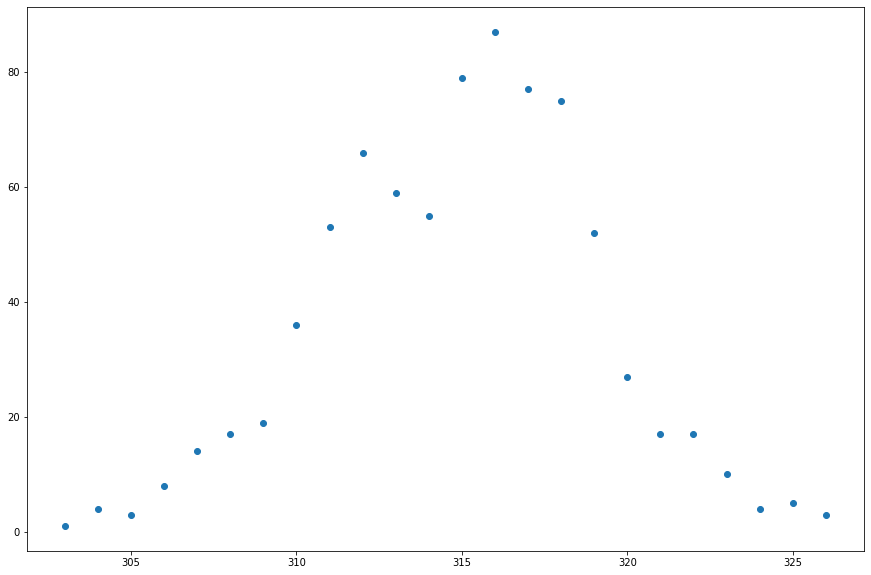

In [14]:
eq2_point = 213  # an index, the first point counted in the eq interval


'''Calculate using 2nd EQ point'''


# Key outputs
eq2_time = timesteps[eq2_point]
print("approx eq2 point is ", str(eq2_time), " which is at step ", str(eq2_point))

pe_eq = np.delete(pe, pe_steps[:eq2_point])
avg_pe = np.average(pe_eq)
print("Average PE: " + str(avg_pe))

coord_eq = np.delete(coord, pe_steps[:eq2_point])
avg_coord = np.average(coord_eq)
print("Average Coordination Number: " + str(avg_coord))

# Uncertainty
std = np.std(coord_eq, ddof=1)
print("std=" + str(std))

import csv
print("distribution: ", coord_eq)
print("time distribution: ", np.delete(timesteps, pe_steps[:eq2_point]))
with open('out/s%d/coord_distr.dat' % S_PARAM, 'w') as f:
    writer = csv.writer(f, delimiter=' ')
    writer.writerows(zip(np.delete(timesteps, pe_steps[:eq2_point]),coord_eq))

    
#Test Normality of the distribution of coordination number after equilibrium
x_range = np.linspace(min(coord_eq), max(coord_eq), num= max(coord_eq) - min(coord_eq) +1)
counts = []
for x in x_range:
    count = 0
    for num in coord_eq:
        if num == x:
            count += 1
    counts.append(count)
fig, ax = plt.subplots(figsize=[15, 10])
ax.scatter(x_range, counts)
plt.show()


with open("out/s%d/out.txt" % S_PARAM, "w") as text_file:
    text_file.write("approx eq2 point is " + str(eq2_time) + " which is at step " + str(eq2_point) + "\n")
    text_file.write("Average PE: " + str(avg_pe) + "\n")
    text_file.write("Average Coordination Number: " + str(avg_coord) + "\n")
    text_file.write("\n" + "std=" + str(std) + "\n")
    text_file.write("distribution: ")
    text_file.write(str(coord_eq))
    text_file.write(str(np.delete(timesteps, pe_steps[:eq2_point])))


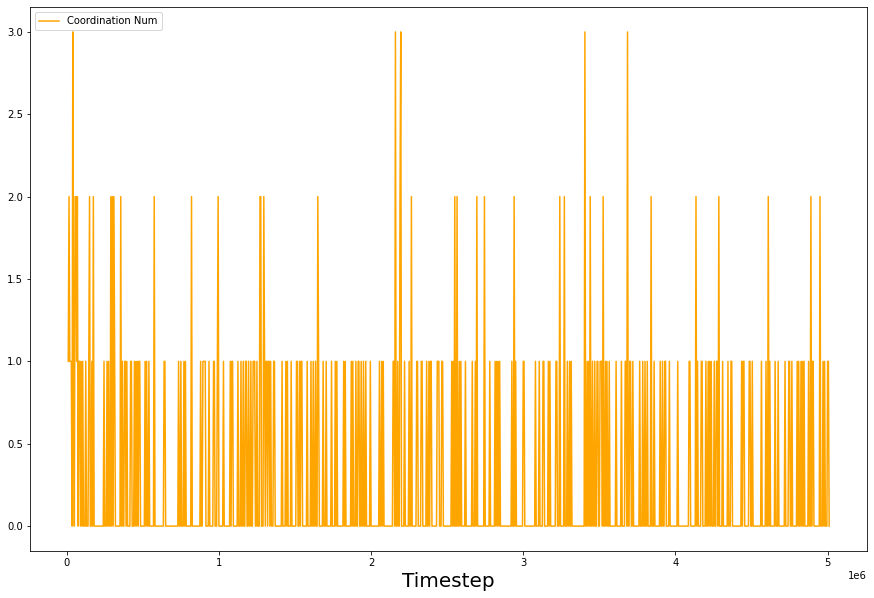

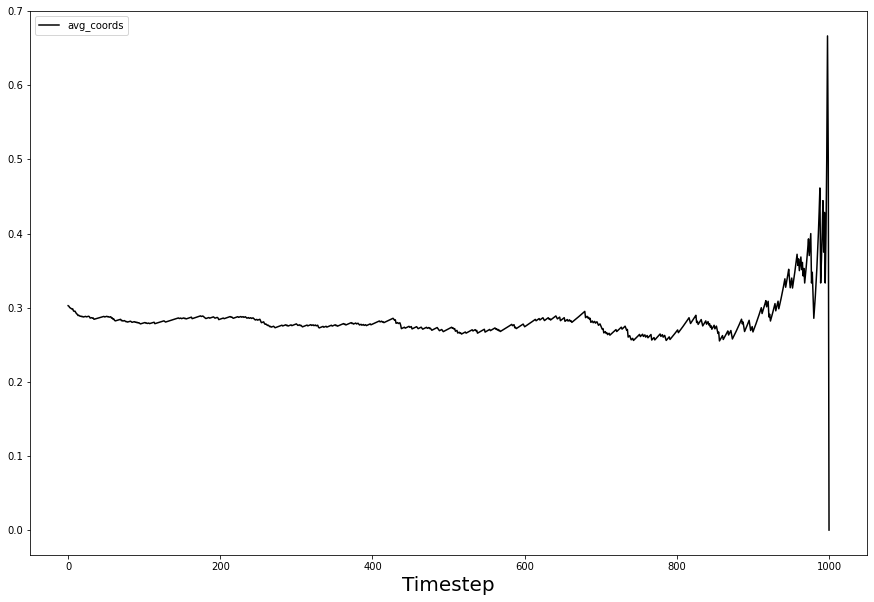

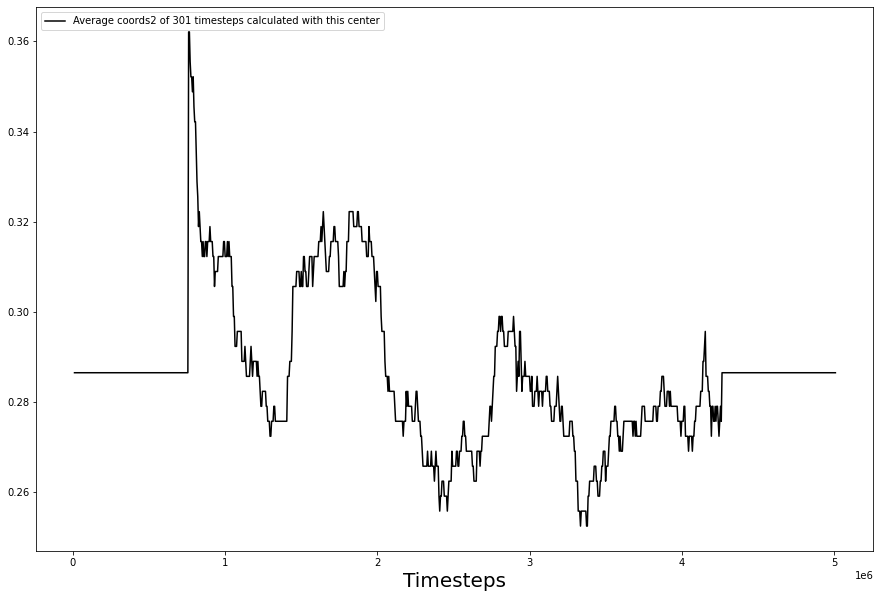

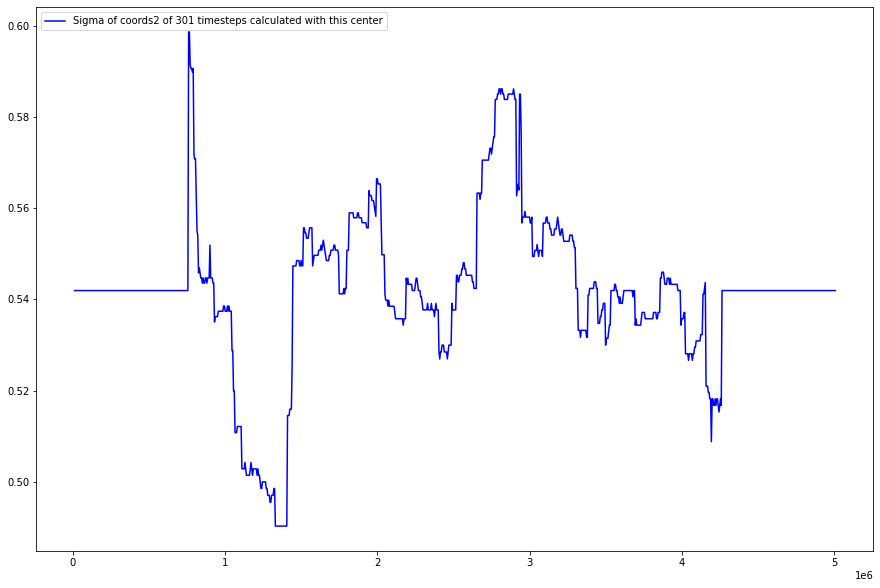

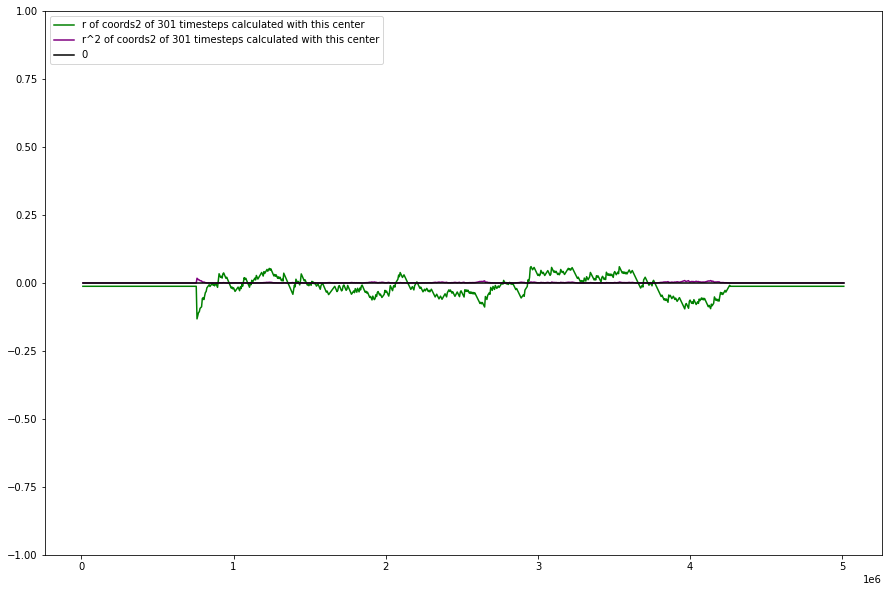

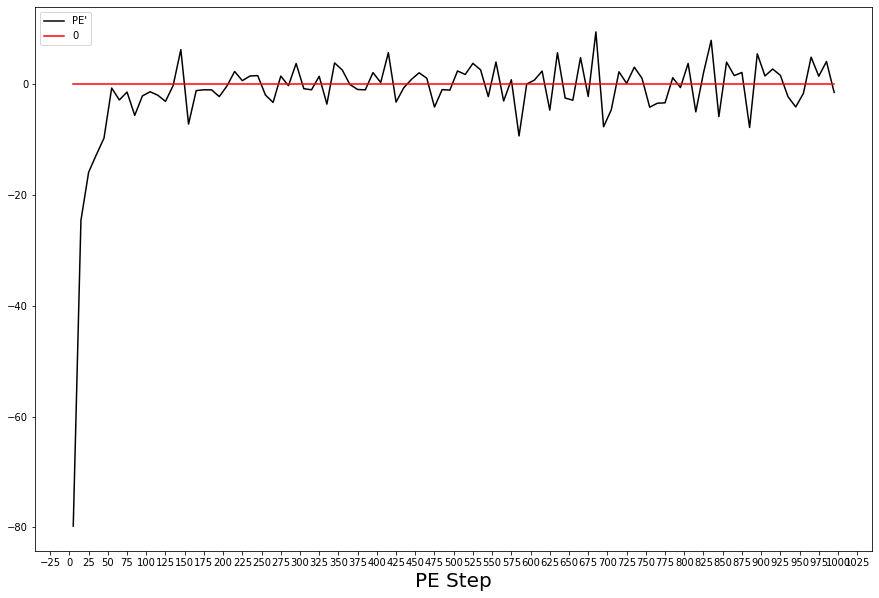

[[135.44293081]
 [149.60282018]
 [206.45403746]
 [249.27816377]
 [272.05640133]
 [283.12614111]
 [285.80634628]
 [303.09169887]
 [319.38768272]
 [327.72686885]
 [339.91238292]
 [364.54084607]
 [388.45586204]
 [421.31100963]
 [439.67331908]
 [466.95659204]
 [498.26336192]
 [540.23266961]
 [548.68776527]
 [560.60697392]
 [573.05519904]
 [575.73580516]
 [595.42650162]
 [618.26874905]
 [629.58144971]
 [641.8739829 ]
 [658.83576696]
 [671.75895738]
 [676.9503781 ]
 [690.4807496 ]
 [711.82935392]
 [746.91642001]
 [782.54786979]
 [791.26342448]
 [796.52142559]
 [809.22509082]
 [822.17077205]
 [840.70549966]
 [851.00988004]
 [877.07069938]
 [890.91827781]
 [928.98451487]
 [957.62572387]
 [992.23324859]]


In [59]:
block_width = 301
fatness = 10


'''FIND 2ND EQUILIBRIUM POINT'''


# Make plots
# Basic plots
# # Plot thermo data
timesteps = thermo_data["timestep"]
# fig, ax = plt.subplots(figsize=[15, 10])
# ax.plot(timesteps, thermo_data["Press"], label="Pressure", color="red", linestyle="solid")
# ax.plot(timesteps, thermo_data["Temp"], label="Temperature", color="orange", linestyle="solid")
# ax.plot(timesteps, thermo_data["E_pair"], label="E_pair", color="green", linestyle="solid")
# ax.plot(timesteps, thermo_data["E_mol"], label="E_mol", color="blue", linestyle="solid")
# ax.plot(timesteps, thermo_data["TotEng"], label="Total Energy", color="purple", linestyle="solid")
# ax.set_xlabel("Timestep", fontsize=20)
# plt.legend(loc="upper left")
# #plt.savefig("figures/s%d/thermo.png" % S_PARAM, bbox_inches="tight")
# #plt.show()
# # Plot e_pair
# fig, ax = plt.subplots(figsize=[15, 10])
# ax.plot(timesteps, thermo_data["E_pair"], label="E_pair", color="green", linestyle="solid")
# ax.set_xlabel("Timestep", fontsize=20)
# plt.legend(loc="upper left")
# #plt.savefig("figures/s%d/epair.png" % S_PARAM, bbox_inches="tight")
# #plt.show()
# Plot coord number
fig, ax = plt.subplots(figsize=[15, 10])
ax.plot(coords_data["timestep"], coords_data["c_coords"], label="Coordination Num", color="orange", linestyle="solid")
ax.set_xlabel("Timestep", fontsize=20)
plt.legend(loc="upper left")
plt.savefig("figures/s%d/coord2.png" % S_PARAM, bbox_inches="tight")
plt.show()

# # Average to the end
# # PE
pe = thermo_data["E_pair"]
pe_steps = [i for i in range(len(pe))]
avg_pes = []
for step in pe_steps:
    #print(pe_steps[:step])
    pe_eq = np.delete(pe, pe_steps[:step])
    avg_pe = np.average(pe_eq)
    avg_pes.append(avg_pe)
# fig, ax = plt.subplots(figsize=[15, 10])
# ax.plot(timesteps, avg_pes, label="avg_pes", color="black", linestyle="solid")
# ax.set_xlabel("Timestep", fontsize=20)
# plt.legend(loc="upper left")
# #plt.savefig("figures/s%d/PE_avg_end.png" % S_PARAM, bbox_inches="tight")
# #plt.show()
# Coord
coord = coords_data["c_coords"]
assert len(pe) == len(coord)
coord_steps = [i for i in range(len(coord))]
avg_coords = []
for step in coord_steps:
    #print(pe_steps[:step])
    coord_eq = np.delete(coord, coord_steps[:step])
    avg_coord = np.average(coord_eq)
    avg_coords.append(avg_coord)
fig, ax = plt.subplots(figsize=[15, 10])
ax.plot(coord_steps, avg_coords, label="avg_coords", color="black", linestyle="solid")
ax.set_xlabel("Timestep", fontsize=20)
plt.legend(loc="upper left")
plt.savefig("figures/s%d/coord2_avg_end.png" % S_PARAM, bbox_inches="tight")
plt.show()

# Block stats
#util.plot_block_stats("s", block_width, pe, timesteps, "PE", S_PARAM)
util.plot_block_stats("s", block_width, coord, timesteps, "coords2", S_PARAM)


# Fat derivatives method
# Initial xlist and ylist: full versions of PE vs. steps
pe = thermo_data["E_pair"]
pe_steps = [i for i in range(len(pe))]

# Reduce both xlist and ylist, i.e. each step is now [fatness] wide instead of one step
fat_pe = []
fat_pe_steps = []
for idx, step in enumerate(pe_steps):
    if idx % fatness == 0:
        fat_pe_steps.append(step)
        fat_pe.append(pe[idx])
x_prime, y_prime = util.num_derivative(fat_pe_steps, fat_pe)

# Plotting
fig, ax = plt.subplots(figsize=[15, 10])
ax.plot(x_prime, y_prime, label="PE'", color="black", linestyle="solid")
ax.plot(x_prime, [0]*len(y_prime), label="0", color="red", linestyle="solid")
ax.set_xlabel("PE Step", fontsize=20)
plt.locator_params(axis='x', nbins=50)
plt.legend(loc="upper left")
plt.savefig("figures/s%d/PE_deriv.png" % S_PARAM, bbox_inches="tight")
plt.show()

# numerical intersections
x  = x_prime
y1 = y_prime
y2 = np.array([0]*len(y_prime))
xcs, _ = util.find_intercepts(x, y1, y2)

print(xcs)


approx eq2 point is  760000  which is at step  150
Average PE: -2076.84420693302
Average Coordination Number: 0.28554641598119856
std=0.535352792878698
distribution:  [0 0 1 0 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0
 0 0 0 0 1 1 0 0 0 1 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1
 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 2 2 0 0 0 2 1 0 1
 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 2 1 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 3 0 0 1 0 0 2 3 0 0 0 0 1 0 0 0
 0 0 1 0 0 2 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0
 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 2 0 0 2 0 0 1 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0
 0 0 0 0

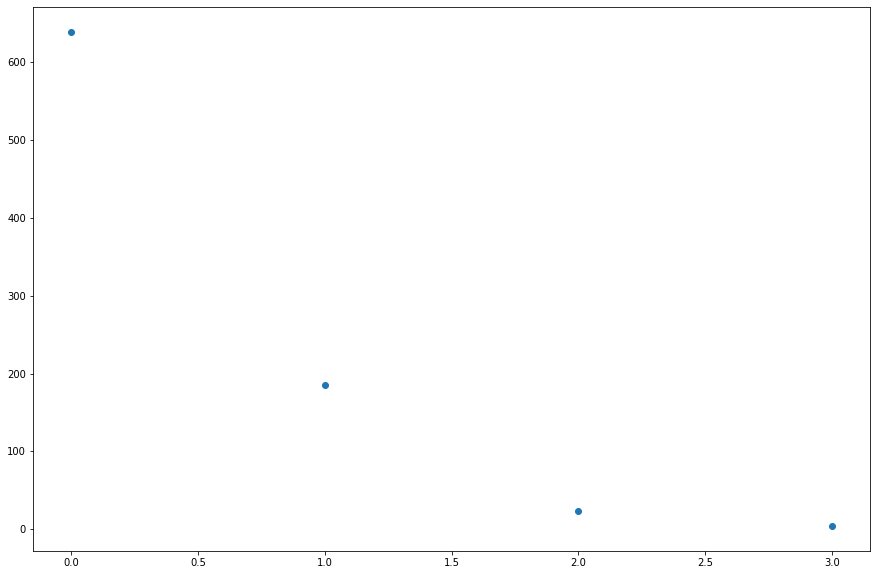

In [60]:
eq2_point = 150  # an index, the first point counted in the eq interval


'''Calculate using 2nd EQ point'''


# Key outputs
eq2_time = timesteps[eq2_point]
print("approx eq2 point is ", str(eq2_time), " which is at step ", str(eq2_point))

pe_eq = np.delete(pe, pe_steps[:eq2_point])
avg_pe = np.average(pe_eq)
print("Average PE: " + str(avg_pe))

coord_eq = np.delete(coord, pe_steps[:eq2_point])
avg_coord = np.average(coord_eq)
print("Average Coordination Number: " + str(avg_coord))

# Uncertainty
std = np.std(coord_eq, ddof=1)
print("std=" + str(std))

import csv
print("distribution: ", coord_eq)
print("time distribution: ", np.delete(timesteps, pe_steps[:eq2_point]))
with open('out/s%d/coord2_distr.dat' % S_PARAM, 'w') as f:
    writer = csv.writer(f, delimiter=' ')
    writer.writerows(zip(np.delete(timesteps, pe_steps[:eq2_point]),coord_eq))

    
#Test Normality of the distribution of coordination number after equilibrium
x_range = np.linspace(min(coord_eq), max(coord_eq), num= max(coord_eq) - min(coord_eq) +1)
counts = []
for x in x_range:
    count = 0
    for num in coord_eq:
        if num == x:
            count += 1
    counts.append(count)
fig, ax = plt.subplots(figsize=[15, 10])
ax.scatter(x_range, counts)
plt.show()


with open("out/s%d/out2.txt" % S_PARAM, "w") as text_file:
    text_file.write("approx eq2 point is " + str(eq2_time) + " which is at step " + str(eq2_point) + "\n")
    text_file.write("Average PE: " + str(avg_pe) + "\n")
    text_file.write("Average Coordination Number: " + str(avg_coord) + "\n")
    text_file.write("\n" + "std=" + str(std) + "\n")
    text_file.write("distribution: ")
    text_file.write(str(coord_eq))
    text_file.write(str(np.delete(timesteps, pe_steps[:eq2_point])))


OLD CODE


Block average, centered around step
PE
half_block = int(0.5*(block_width-1))
avg_pes = []
sigma_pes = []
r_pes = []
step_range = range(len(pe))[half_block:-half_block]
for step in step_range:
    pe_block = pe[step-half_block:step+half_block+1]
    avg_pe = np.average(pe_block)
    avg_pes.append(avg_pe)
    sigma_pes.append(np.std(pe_block, ddof=1))
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
        timesteps[step-half_block:step+half_block+1], pe_block)
    r_pes.append(r_value)
timestep_range = [timesteps[i] for i in step_range]
fig, ax = plt.subplots(figsize=[15, 10])
ax.plot(timestep_range, avg_pes, label="Average PE of %d timesteps calculated with this center" % block_width, 
        color="black", linestyle="solid")
ax.set_xlabel("Timesteps", fontsize=20)
plt.legend(loc="upper left")
plt.savefig("figures/s%d/PE_avg_block.png" % S_PARAM, bbox_inches="tight")
plt.show()
Coord
avg_coords = []
sigma_coords = []
for step in step_range:
    coord_block = coord[step-half_block:step+half_block+1]
    avg_coord = np.average(coord_block)
    avg_coords.append(avg_coord)
    sigma_coords.append(np.std(coord_block, ddof=1))
timestep_range = [timesteps[i] for i in step_range]
fig, ax = plt.subplots(figsize=[15, 10])
ax.plot(timestep_range, avg_coords, label="Average Coord # of %d timesteps calculated with this center" % 
        block_width, 
        color="black", linestyle="solid")
ax.set_xlabel("Timesteps", fontsize=20)
plt.legend(loc="upper left")
plt.savefig("figures/s%d/Coord_avg_block.png" % S_PARAM, bbox_inches="tight")
plt.show()
Sigmas
fig, ax = plt.subplots(figsize=[15, 10])
ax.plot(timestep_range, sigma_pes, label="Sigma of PE of %d timesteps calculated with this center" % block_width, 
        color="blue", linestyle="solid")
plt.legend(loc="upper left")
plt.savefig("figures/s%d/sigmas_coord_pe_block.png" % S_PARAM, bbox_inches="tight")
plt.show()
fig, ax = plt.subplots(figsize=[15, 10])
ax.plot(timestep_range, sigma_coords, label="Sigma of Coords of %d timesteps calculated with this center" % 
        block_width, color="red", linestyle="solid")
plt.legend(loc="upper left")
plt.savefig("figures/s%d/sigmas_coord_pe_block.png" % S_PARAM, bbox_inches="tight")
plt.show()